##### Importing Libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import defaultdict
from PIL import ImageDraw,Image

##### Reading the Image and Conversion to Grayscale

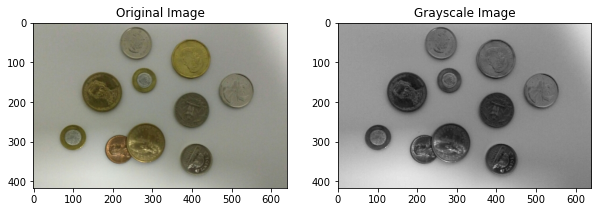

In [50]:
img=cv2.imread('coins.jpg')

fig=plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.subplot(1,2,2)
plt.title('Grayscale Image')
plt.imshow(img_gray,cmap='gray')

plt.show()


##### Defining the Hough_circles class for implementing the Hough's Circle Detection Algorithm

In [87]:
class Hough_circles:
    
    #x-a=rcost ,y-b=rsint or a=x-rcost, b=y-rsint 
    # we want to find circles given point x,y
    # in the parameter space we have a,b,r and these represent a circle in the parameter space which is representative of all circles that
    #can pass through x,y with a given radius r in the x,y space

    def __init__(self,rmin,rmax,thresh):
        self.rmin=rmin
        self.rmax=rmax
        self.thresh=thresh
        self.acc=defaultdict(int)

    def find_circle(self,img):
        points=[]
        theta = np.arange(0,360)*np.pi/180
        edges = np.argwhere(img[:,:]) 
        for r in range(self.rmin,self.rmax+1):
            for t in theta:
                points.append([r,int(r*np.cos(t)),int(r*np.sin(t))])

        #for each of the radius r in the radius array vary theta values from 0-360 to find all circles for that radius
        for x,y in edges:
                for r,mx,my in points:
                        a=x-mx
                        b=y-my
                        self.acc[(a,b,r)]+=1
        return self.acc,points,edges

    def draw_circles(self,img):
        input_image = Image.open("coins.jpg")
        # Output image:
        output_image = Image.new("RGB", input_image.size)
        output_image.paste(input_image)
        draw_result = ImageDraw.Draw(output_image)
        circles = []
        for k, v in sorted(acc.items(), key=lambda i: -i[1]):
            x, y, r = k
            if v  >= self.thresh  and all((x - xc) ** 2 + (y - yc) ** 2 > rc ** 2 for xc, yc, rc in circles):
                print(v, x, y, r)
                circles.append((x, y, r))

        for x, y, r in circles:
            draw_result.ellipse((y-r, x-r, y+r, x+r), outline=(255,0,0,0))
        plt.title('Detected Coins')
        plt.imshow(output_image)


##### Blurring and Edge Detection

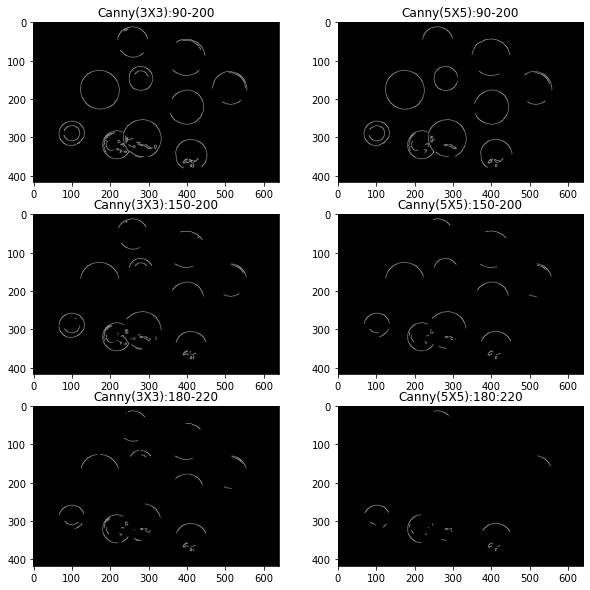

In [52]:

blurr_1=cv2.GaussianBlur(img_gray,(3,3),0)
blurr_2=cv2.GaussianBlur(img_gray,(5,5),0)

#img_thesholding for extracting region of interest
#img_thresh=cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,199,6)


#canny edge detection on blurred image
img_canny01=cv2.Canny(blurr_1,90,200)
img_canny02=cv2.Canny(blurr_2,90,200)

img_canny11=cv2.Canny(blurr_1,150,200)
img_canny12=cv2.Canny(blurr_2,150,200)

img_canny21=cv2.Canny(blurr_1,180,230)
img_canny22=cv2.Canny(blurr_2,180,230)

#kernel=np.ones((2,2),np.uint8)
#img_dilation=cv2.dilate(img_canny,kernel,iterations=1)
r=3
c=2
fig=plt.figure(figsize=(10,10))

plt.subplot(r,c,1)
plt.title('Canny(3X3):90-200')
plt.imshow(img_canny01,cmap='gray')

plt.subplot(r,c,2)
plt.title('Canny(5X5):90-200')
plt.imshow(img_canny02,cmap='gray')

plt.subplot(r,c,3)
plt.title('Canny(3X3):150-200')
plt.imshow(img_canny11,cmap='gray')

plt.subplot(r,c,4)
plt.title('Canny(5X5):150-200')
plt.imshow(img_canny12,cmap='gray')

plt.subplot(r,c,5)
plt.title('Canny(3X3):180-220')
plt.imshow(img_canny21,cmap='gray')

plt.subplot(r,c,6)
plt.title('Canny(5X5):180:220')
plt.imshow(img_canny22,cmap='gray')

plt.show()

##### Finding and Drawing Circles on the Original Image using the Hough's Algorithm

In [88]:
hc=Hough_circles(9,80,115)
acc,points,edges=hc.find_circle(img_canny01)
print(max(acc.values()))
coord=hc.draw_circles(img)
print(coord)
